In [1]:
# Ensure the module is automatically reloaded when rerunning the import command.
# %load_ext autoreload
# %autoreload 2

# TODO: add calibration/speed stuff

In [2]:
import matplotlib.pyplot as plt
import piv_functions as piv
import numpy as np
directory = 'PIVimages/shearflow'
prefix = None
type = 'png'
images = piv.read_image_directory(directory, prefix, type)

In [3]:
correlation = piv.correlate_image_pair(images[0], images[1], plot=False)

In [4]:
displacement = piv.find_displacement(correlation)

In [5]:
window_size = 128
windows0, coordinates0 = piv.divide_in_windows(images[0], (window_size, window_size))
windows1, coordinates1 = piv.divide_in_windows(images[1], (window_size, window_size))

In [15]:
piv.correlate_image_pair(windows0[1,1], windows1[1,1]).shape

(255, 255)

In [17]:
# Calculate the correlation of each window j,i in frame 0 with the 
# corresponding window in frame 1
correlations = np.array([[piv.correlate_image_pair(windows0[j, i], 
                                                   windows1[j, i]) for i in 
                          range(len(windows0[0]))] for j in range(len(windows0[1]))])

# Calculate the displacement of each window j,i in frame 0 with the
# corresponding window in frame 1
displacements = np.array([[piv.find_displacement(correlation) for correlation in row] for row in correlations])

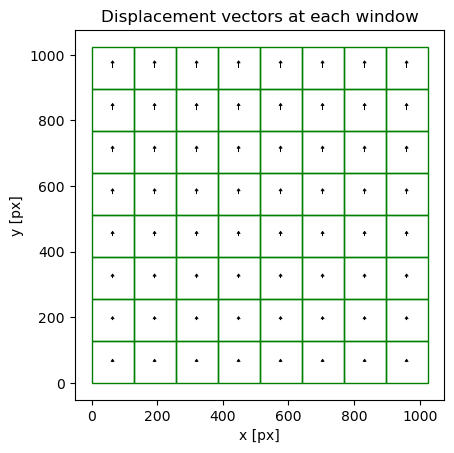

In [31]:
# Plot all displacements vectors at the center of each window
fig, ax = plt.subplots()

# Show a grid with the outline of each window and an arrow in the centre 
# indicating the displacement
for j in range(len(windows0[0])):
    for i in range(len(windows0[1])):
        # Calculate the center of the window
        center = (coordinates0[j, i][0] + window_size // 2, coordinates0[j, i][1] + window_size // 2)
        # Calculate the end of the arrow
        end = (center[0] + displacements[j, i][0], center[1] + displacements[j, i][1])
        # Plot the arrow
        ax.arrow(center[0], center[1], displacements[j, i][0], 
                 displacements[j, i][1], head_width=10, head_length=7, 
                 fc='k', ec='k', lw=0.5)
        # Plot the window
        ax.add_patch(plt.Rectangle((coordinates0[j, i][0], coordinates0[j, 
        i][1]), window_size, window_size, fill=None, edgecolor='g'))
        
# Aspect ratio should be 1
ax.set_aspect('equal')

ax.set_xlabel('x [px]')
ax.set_ylabel('y [px]')
ax.set_title('Displacement vectors at each window')

plt.show()


In [ ]:
np.array([2, 1]) + 2